In [1]:
import urllib2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [25]:
dataset = urllib2.urlopen('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv')
data = pd.read_csv(dataset)

In [26]:
data.head(n=20)


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
5,6,No,Yes,919.588530,7491.558572
6,7,No,No,825.513331,24905.226578
7,8,No,Yes,808.667504,17600.451344
8,9,No,No,1161.057854,37468.529288
9,10,No,No,0.000000,29275.268293


2) Convert `default` and `student` to categorical variables.

In [30]:
def get_y(y):
    if y.find("No")>-1:
        return 0
    else:
        return 1

data_temp = data

data_temp['default'] = data_temp['default'].apply(lambda y: get_y(y))
data_temp['student'] = data_temp['student'].apply(lambda y: get_y(y))

AttributeError: 'int' object has no attribute 'find'

In [34]:
data_final = data_temp
data_final = data_final.drop('Unnamed: 0',1)
data_final.head(n=20)

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
5,0,1,919.588530,7491.558572
6,0,0,825.513331,24905.226578
7,0,1,808.667504,17600.451344
8,0,0,1161.057854,37468.529288
9,0,0,0.000000,29275.268293


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

/Users/lingxiangyu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


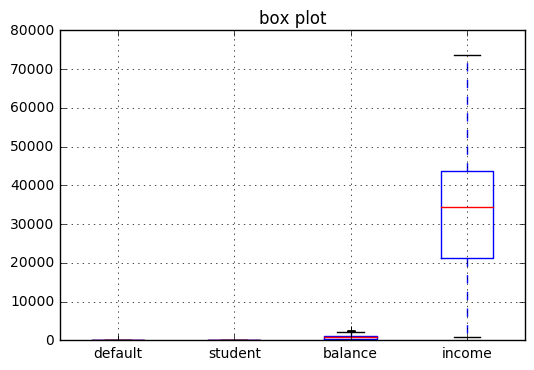

In [35]:
data_final.boxplot()
plt.title('box plot')
plt.show()

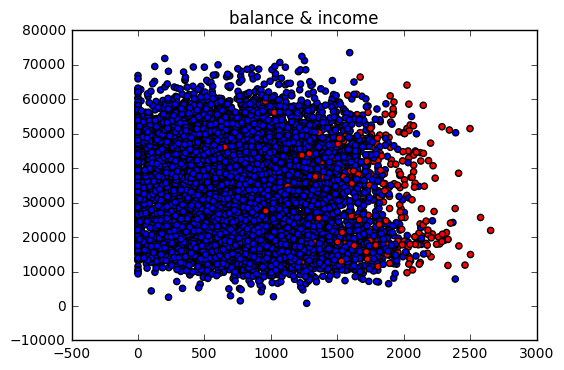

In [36]:
fig, ax = plt.subplots()
col = {0:'blue', 1:'red'}
ax.scatter(data_final.balance, data_final.income, c=data_final['default'].apply(lambda x: col[x]))
plt.title('balance & income')
plt.show()

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

In [37]:
X1 = data_final[['balance','income']]
y1 = data_final[['default']]

scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

n1_samples, n1_features = X1.shape

half = int(n1_samples/2)
X1_train, X1_test = X1[:half], X1[half:]
y1_train, y1_test = y1[:half], y1[half:]




In [38]:
regr1 = LogisticRegression()
model1 = regr1.fit(X1_train, y1_train)
probs = model1.predict_proba(X1_test)
coeff1 = regr1.coef_
inter1 = regr1.intercept_
#plt.contour(X1_test,y1_test, probs1, levels=[0.5])
#plt.show()

In [39]:
coeff1

array([[ 2.56607338,  0.34412227]])

In [40]:
inter1

array([-5.7113737])

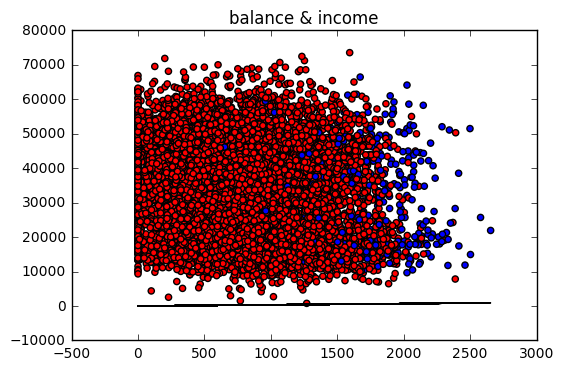

In [43]:
fig, ax = plt.subplots()
col = {0:'red', 1:'blue'}
ax.scatter(data_final.balance, data_final.income, c=data_final['default'].apply(lambda x: col[x]))
plt.title('balance & income')

plt.plot(data_final.balance, data_final.balance*coeff1[0,1] + inter1[0], 'black')

plt.show()

Area under the ROC curve : 0.500000
Area under the ROC curve : 0.500000
Area under the ROC curve : 0.500000
Area under the ROC curve : 0.500000
Area under the ROC curve : 0.959417
Area under the ROC curve : 0.959417
Area under the ROC curve : 0.959417
Area under the ROC curve : 0.959417
Area under the ROC curve : 0.959417
Area under the ROC curve : 0.959417
Area under the ROC curve : 0.959417
Area under the ROC curve : 0.959417
Area under the ROC curve : 0.959417
Area under the ROC curve : 0.959417
Area under the ROC curve : 0.959417
Area under the ROC curve : 0.959417
Area under the ROC curve : 0.959417
Area under the ROC curve : 0.959417
Area under the ROC curve : 0.959417
Area under the ROC curve : 0.959417
Area under the ROC curve : 0.959889
Area under the ROC curve : 0.960190
Area under the ROC curve : 0.960491
Area under the ROC curve : 0.960634
Area under the ROC curve : 0.960806
Area under the ROC curve : 0.960963
Area under the ROC curve : 0.961021
Area under the ROC curve : 0

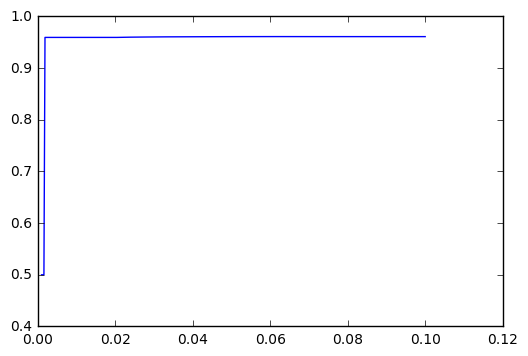

In [16]:
#compute AUC ROC
def generate_auc(X,y,clf_class,**kwargs):
    random_state = np.random.RandomState(0)
    X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    X_train, X_test = X[:half], X[half:]
    y_train, y_test = y[:half], y[half:]
    
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print "Area under the ROC curve : %f" % roc_auc
    return fpr, tpr, roc_auc, thresholds


alphas = np.logspace(-3,-1,30)
scores = []

for alpha in alphas:
    regr = LogisticRegression(C=alpha,penalty='l1')

    fpr, tpr, roc_auc, thresholds= generate_auc(X1,y1,LogisticRegression,C=alpha,penalty='l1')
    scores.append(roc_auc)

plt.plot(alphas,scores)
plt.show()

5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

In [17]:
X2 = data_final[['balance','income','student-No']]
y2 = data_final[['default-No']]

scaler = StandardScaler()
X2 = scaler.fit_transform(X1)

n2_samples, n2_features = X2.shape

In [18]:
#decision boundary

Area under the ROC curve : 0.960033
Area under the ROC curve : 0.960190
Area under the ROC curve : 0.960219
Area under the ROC curve : 0.960448
Area under the ROC curve : 0.960505
Area under the ROC curve : 0.960520
Area under the ROC curve : 0.960648
Area under the ROC curve : 0.960634
Area under the ROC curve : 0.960763
Area under the ROC curve : 0.960792
Area under the ROC curve : 0.960835
Area under the ROC curve : 0.960892
Area under the ROC curve : 0.960978
Area under the ROC curve : 0.960978
Area under the ROC curve : 0.961035
Area under the ROC curve : 0.961035
Area under the ROC curve : 0.960963
Area under the ROC curve : 0.960978
Area under the ROC curve : 0.960963
Area under the ROC curve : 0.960935
Area under the ROC curve : 0.960935
Area under the ROC curve : 0.960820
Area under the ROC curve : 0.960835
Area under the ROC curve : 0.960820
Area under the ROC curve : 0.960835
Area under the ROC curve : 0.960849
Area under the ROC curve : 0.960777
Area under the ROC curve : 0

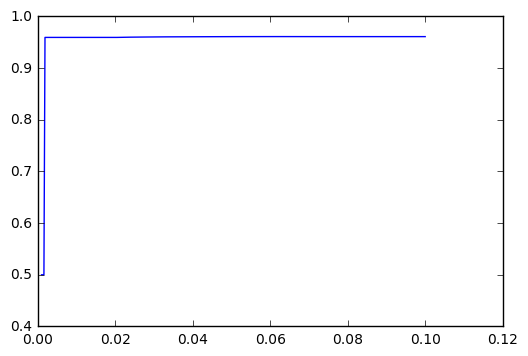

In [19]:
#compute AUC ROC
def generate_auc(X,y,clf_class,**kwargs):
    random_state = np.random.RandomState(0)
    X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    X_train, X_test = X[:half], X[half:]
    y_train, y_test = y[:half], y[half:]
    
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print "Area under the ROC curve : %f" % roc_auc
    return fpr, tpr, roc_auc, thresholds


alphas = np.logspace(-3,-1,30)
scores2 = []

for alpha in alphas:
    regr = LogisticRegression(C=alpha,penalty='l2')

    fpr, tpr, roc_auc, thresholds= generate_auc(X2,y2,LogisticRegression,C=alpha,penalty='l2')
    scores2.append(roc_auc)
    
plt.plot(alphas,scores)
plt.show()

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

8) Find the optimal decision tree depth and compute the AUC ROC. 